# 反応拡散モデル　ギーラー-マインハルト系
$$
\begin{cases}
\frac{\partial u}{\partial t} = D_u \nabla^2 u - d_u u + k_1 \frac{u^2}{v} + k_2\\
\frac{\partial v}{\partial t} = D_v \nabla^2 v - d_v v \ + k_3 u^2 
\end{cases}
$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def rd_u(u_arr, v ,D_u,d_u, k_1, k_2, dh, dt):
    new_u = u_arr[1,1] \
    + (
        D_u*(u_arr[0,1] + u_arr[2,1] + u_arr[1,0] + u_arr[1,2] - 4*u_arr[1,1])/(dh**2)
        - d_u*u_arr[1,1] + k_1*u_arr[1,1]**2/v + k_2
    )*dt
    return new_u

def rd_v(v_arr, u ,D_v, d_v, k_3, dh, dt):
    new_v = v_arr[1,1] \
    +(
         D_v*(v_arr[0,1] + v_arr[2,1] + v_arr[1,0] + v_arr[1,2] - 4*v_arr[1,1])/(dh**2)
        - d_v*v_arr[1,1] + k_3*u**2
    )*dt
    return new_v

def update(u, v, D_u, D_v, d_u, d_v, k_1, k_2, k_3, dh, dt):
    """反応拡散モデルに基づくuの更新
    
    場の更新をおこなう．
    周期境界条件を仮定している．
    
    Args:
        u,v:  アクチベーターとインヒビターの現在の場の配列
        D_u, D_v: 拡散係数
        d_u, d_v: 分解率
        k_1: アクチベーターの自己活性化・インヒビターによる抑制
        k_2: アクチベーターの基本的な生成
        k_3: アクチベーターによるインヒビターの生産促進
    Returns:
        u_new, v_new: 次世代の場の配列
    """
    n_i, n_j = u.shape
    new_u = np.zeros((n_i, n_j),dtype=u.dtype)
    new_v = np.zeros((n_i, n_j),dtype=u.dtype)
    
    for i in range(n_i):
        for j in range(n_j):
            if i == 0:
                if j == 0:
                    # 境界条件処理 i=0,j=0
                    new_u[i,j] = rd_u(u[[-1,0,1],:][:,[-1,0,1]], v[i,j], D_u,d_u,k_1,k_2, dh, dt)
                    new_v[i,j] = rd_v(v[[-1,0,1],:][:,[-1,0,1]], u[i,j], D_v, d_v, k_3, dh, dt)
                elif 0<j<n_j-1:
                    # 境界条件処理 i=0,0<j<n_j-1
                    new_u[i,j] = rd_u(u[[-1,0,1],:][:,[j-1,j,j+1]],v[i,j], D_u,d_u,k_1,k_2, dh, dt)
                    new_v[i,j] = rd_v(v[[-1,0,1],:][:,[j-1,j,j+1]],u[i,j], D_v, d_v, k_3, dh, dt)
                elif j == n_j-1:
                    # 境界条件処理 i=0,j=n_j-1
                    new_u[i,j] = rd_u(u[[-1,0,1],:][:,[n_j-2,n_j-1,0]], v[i,j], D_u,d_u,k_1,k_2, dh, dt)
                    new_v[i,j] = rd_v(v[[-1,0,1],:][:,[n_j-2,n_j-1,0]], u[i,j], D_v, d_v, k_3, dh, dt)
            elif 0 < i < n_i-1:
                if j == 0:
                    # 境界条件処理 1<i<n_i-1,j=0
                    new_u[i,j] = rd_u(u[[i-1,i,i+1],:][:,[-1,0,1]], v[i,j], D_u,d_u,k_1,k_2, dh, dt)
                    new_v[i,j] = rd_v(v[[i-1,i,i+1],:][:,[-1,0,1]], u[i,j], D_v, d_v, k_3, dh, dt)
                elif 0 < j< n_j-1:
                    # メイン （1<i<n_i-1,1<j<n_j-1）
                    new_u[i,j] = rd_u(u[[i-1,i,i+1],:][:,[j-1,j,j+1]], v[i,j], D_u,d_u,k_1,k_2, dh, dt)
                    new_v[i,j] = rd_v(v[[i-1,i,i+1],:][:,[j-1,j,j+1]], u[i,j], D_v, d_v, k_3, dh, dt)
                elif j == n_j-1:
                    # 境界条件処理 1<i<n_i-1,j=n_j-1
                    new_u[i,j] = rd_u(u[[i-1,i,i+1],][:,[n_j-2,n_j-1,0]], v[i,j], D_u,d_u,k_1,k_2, dh, dt)
                    new_v[i,j] = rd_v(v[[i-1,i,i+1],][:,[n_j-2,n_j-1,0]], u[i,j], D_v, d_v, k_3, dh, dt)
            elif i == n_i-1:
                if j == 0:
                    # 境界条件処理 i=n_i,j=0
                    new_u[i,j] = rd_u(u[[n_i-2,n_i-1,0],][:,[-1,0,1]], v[i,j], D_u,d_u,k_1,k_2, dh, dt)
                    new_v[i,j] = rd_v(v[[n_i-2,n_i-1,0],][:,[-1,0,1]], u[i,j], D_v, d_v, k_3, dh, dt)
                elif 0<j<n_j-1:
                    # 境界条件処理 i=n_i-1,1<j<n_j-1
                    new_u[i,j] = rd_u(u[[n_i-2,n_i-1,0],][:,[j-1,j,j+1]], v[i,j], D_u,d_u,k_1,k_2, dh, dt)
                    new_v[i,j] = rd_v(v[[n_i-2,n_i-1,0],][:,[j-1,j,j+1]], u[i,j], D_v, d_v, k_3, dh, dt)
                elif j == n_j-1:
                    # 境界条件処理 i=n_i-1,j=n_j-1
                    new_u[i,j] = rd_u(u[[n_i-2,n_i-1,0],][:,[n_j-2,n_j-1,0]], v[i,j], D_u,d_u,k_1,k_2, dh, dt)
                    new_v[i,j] = rd_v(v[[n_i-2,n_i-1,0],][:,[n_j-2,n_j-1,0]], u[i,j], D_v, d_v, k_3, dh, dt)
    
    return (new_u, new_v)

In [22]:
D_u = 1.2# 拡散係数 D_uを1~1.5ぐらいで動かす
D_v = 10 # 拡散係数
d_u = 1.0
d_v = 1.0
k_1 = 1.0
k_2 = 0.05
k_3 = 1.0

dt = 0.02 # 時間方向の刻み幅
dh = 1 # 空間方向の刻み幅

x = np.arange(-25,25,dh)
y = np.arange(-25,25,dh)
xmesh,ymesh = np.meshgrid(x,y)

T = 1000
nEnd = int(T/dt) # 時間に関するループの繰り返し数
print("繰り返し数: ", nEnd)

tList = [] # 時刻を記録するリスト
uList = [] # uを記録するリスト
vList = [] # vを記録するリスト

# u,vの初期化
u = np.ones([len(x) ,len(y)],dtype = float) 
u = u + np.random.uniform(0,0.01,size=u.shape)
v = np.ones([len(x) ,len(y)],dtype = float) 
v = v + np.random.uniform(0,0.01,size=u.shape)

tList.append(0)
uList.append(np.copy(u))
vList.append(np.copy(v))

for n in range(nEnd):
    t = n*dt # 時刻tの計算
    
    # -- 状態遷移 --
    u_tmp,v_tmp = update(u, v, D_u, D_v, d_u, d_v, k_1, k_2, k_3, dh, dt)
    
    # 情報の更新
    u = np.copy(u_tmp)
    v = np.copy(v_tmp)
    if n%10000 == 0:
        print("Steps: ", n)
    if n%100 == 0:
        tList.append(t)
        uList.append(np.copy(u))
        vList.append(np.copy(v))
print(len(tList))

繰り返し数:  50000
Steps:  0
Steps:  10000
Steps:  20000
Steps:  30000
Steps:  40000
5001


t=  999.8000000000001


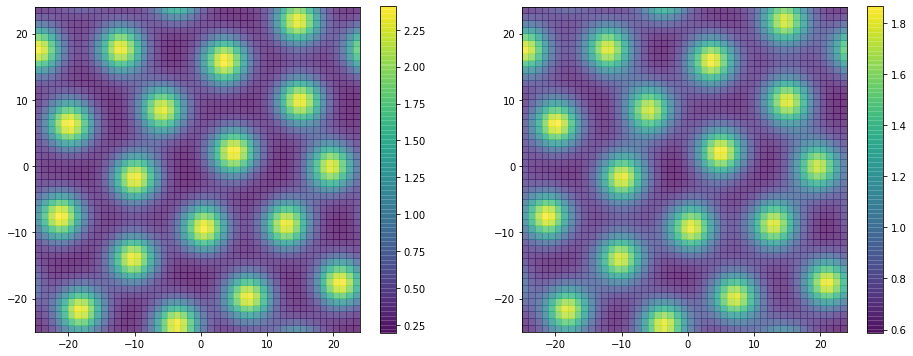

In [23]:
i = -1
fig, ax = plt.subplots(1,2,figsize=(16, 8))

ax[0].set_aspect('equal')
pcm = ax[0].pcolormesh(xmesh,ymesh,uList[i],alpha=0.75)
fig.colorbar(pcm, ax=ax[0], shrink=0.75)

ax[1].set_aspect('equal')
pcm = ax[1].pcolormesh(xmesh,ymesh,vList[i],alpha=0.75)
fig.colorbar(pcm, ax=ax[1], shrink=0.75)

title = ["D_u = " + str(D_u), "D_v = " + str(D_v), "d_u = "+str(d_u), "d_v = "+str(d_v), 
         "k_1 = "+str(k_1),"k_2 = "+str(k_2),"k_3 = "+str(k_3)]
fig.tight_layout()
fig.suptitle(", ".join(title)+"; t="+str(tList[i]),fontsize=20)
plt.show()

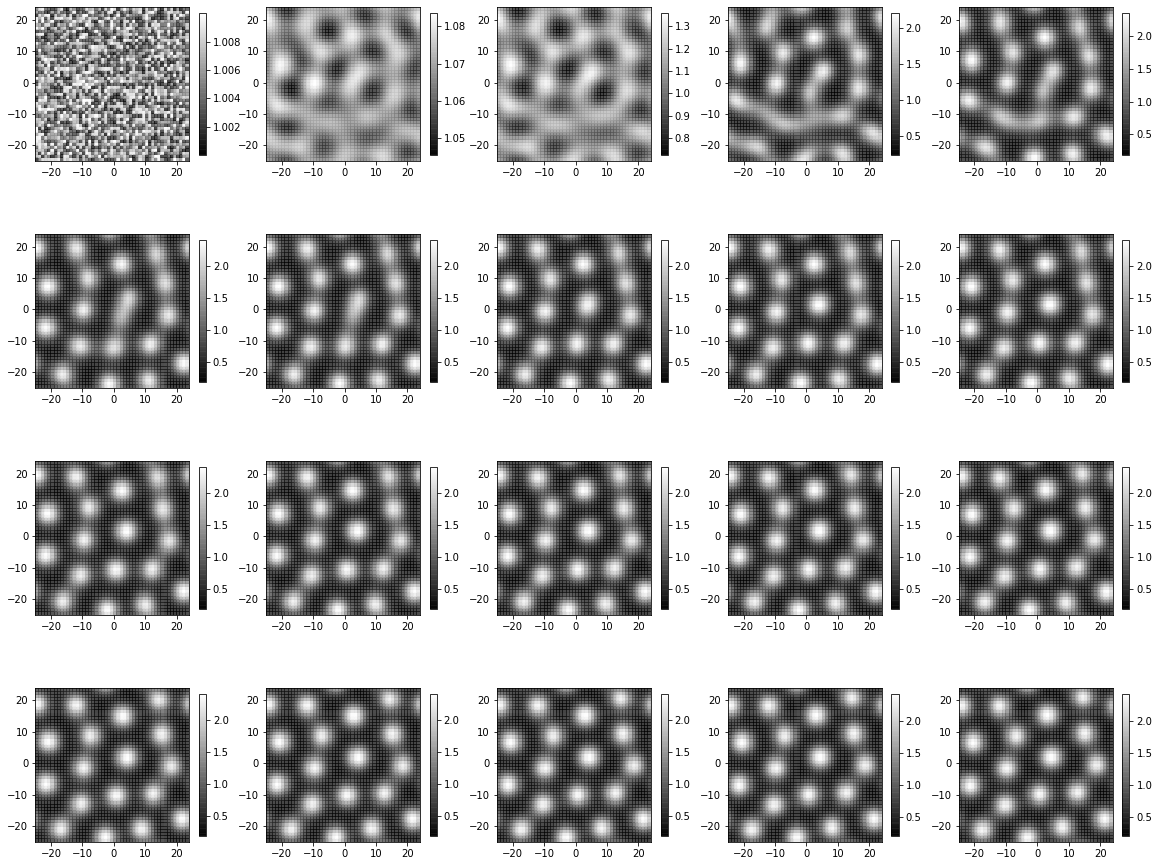

In [24]:
step = 200
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
for i in [i*step for i in range(20)]:
    ax = axes.flat[i//step]
    ax.set_aspect('equal')
    pcm = ax.pcolormesh(xmesh,ymesh,uList[i],alpha=0.75,cmap="gray")
    
    fig.colorbar(pcm, ax=ax, shrink=0.75)
    ax.set_title("t = " + str(tList[i]))
title = ["D_u = " + str(D_u), "D_v = " + str(D_v), "d_u = "+str(d_u), "d_v = "+str(d_v), 
         "k_1 = "+str(k_1),"k_2 = "+str(k_2),"k_3 = "+str(k_3)]
fig.tight_layout()
fig.suptitle(", ".join(title))
plt.show()

In [16]:
len(uList)

4001